In [8]:
### GENERAL REQUIREMENTS - will install the libraries

import pandas as pd
import numpy as np
import math
import nltk
import requests
import re
import json
import io
import time # to avoid errors, we sometime use time.sleep(N) before retrying a request
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import geopandas
from shapely.geometry import Point
from functools import partial
from shapely.ops import transform
import pyproj

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import seaborn as sns
import geoplot as gplt

from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import sddk

In [10]:
url = "https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson"
pleiades_regions = geopandas.read_file(url, crs={"init": "epsg:3857"})

In [2]:
# read the datasets
publicfolder = "e0f9cd400dd05584fe06fe1d804deff0"
EDH = sddk.read_file("EDH_occupsorgs_2021-02-26.json", "df", publicfolder)


reading file located in a public folder


In [3]:
# EDH as geodataframe
EDHg = EDH[EDH["coordinates"].apply(lambda x: isinstance(x, list))]
EDHg = geopandas.GeoDataFrame(EDHg, geometry=geopandas.points_from_xy(EDHg["coordinates"].apply(lambda x: x[0]), EDHg["coordinates"].apply(lambda x: x[1])), crs={"init": "epsg:3857"})

In [ ]:
EDHg_aoristic = EDHg.apply

<AxesSubplot:>

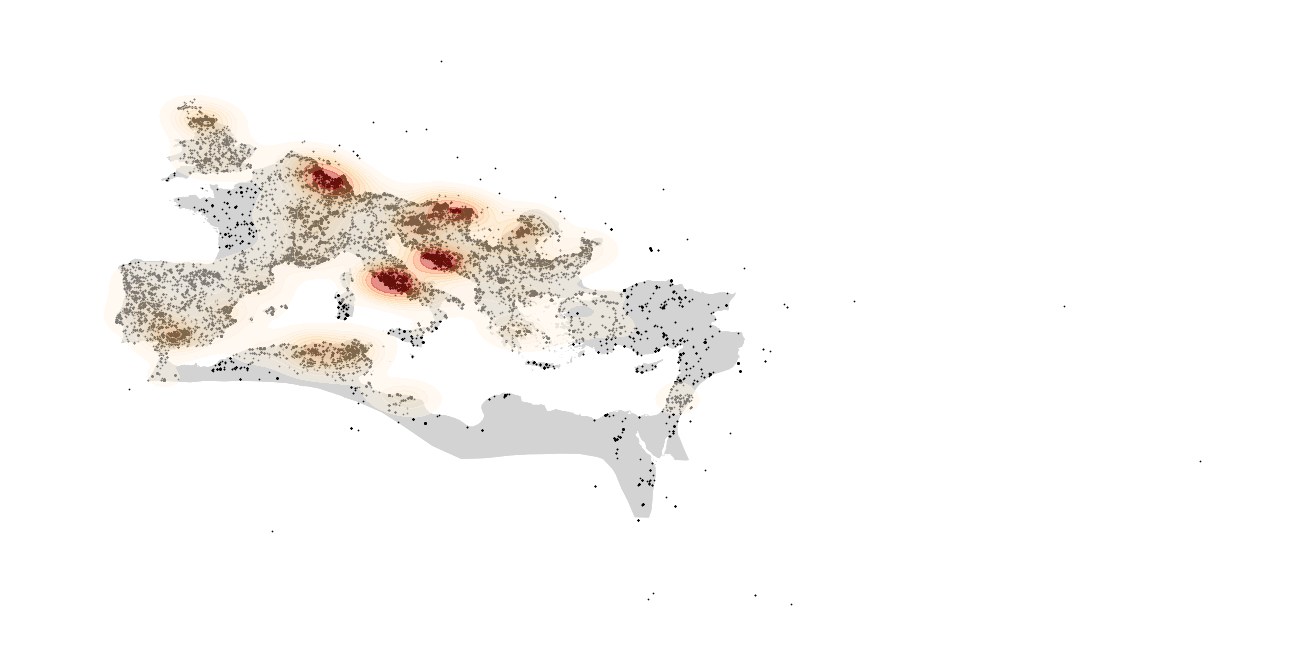

In [25]:
fig, ax = plt.subplots(figsize=[24, 12])
pleiades_regions.plot(ax=ax, color="lightgray")
EDHg.plot(markersize=0.5, color="black", ax=ax)
geoplot.kdeplot(EDHg, cmap='OrRd', shade=True, alpha=0.5, ax=ax) # , clip=EDHg.geometry,